#### Importation

In [3]:
from dotenv import load_dotenv
import pandas as pd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
# load_dotenv()
load_dotenv('.env')

HOST_AND_PORT = os.getenv('DB_HOST_AND_PORT')
DB_NAME = os.getenv('DB_NAME')
USERNAME = os.getenv('DB_USERNAME')
PASSWORD = os.getenv('DB_PASSWORD')

print(f'{DB_NAME}' )

# Create the DB engine connector
engine = create_engine(f'mysql://{USERNAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}')

pd.read_sql_query("SHOW TABLES;", engine)



sakila


,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


#### Revenue of active and inactive members

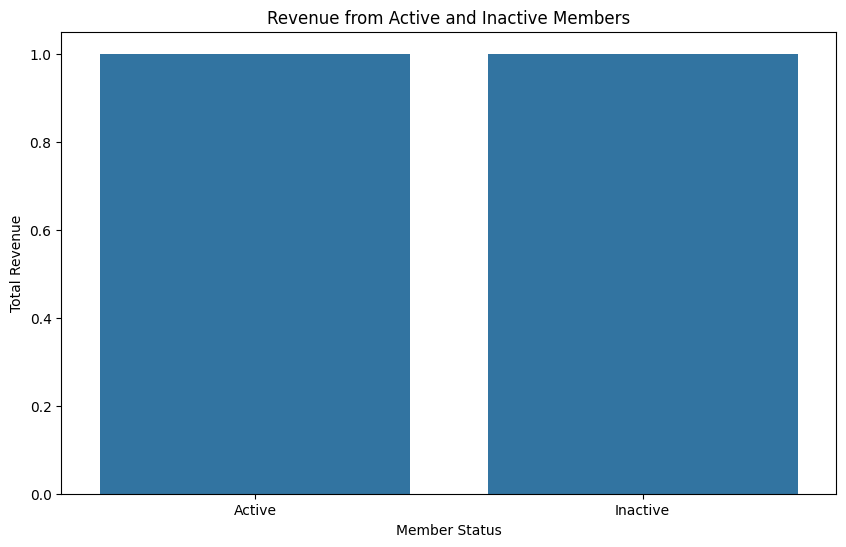

In [4]:
# Determine how much we made in revenue from active and inactive members. Visualize the result as a bar chart. 
# Query to get revenue from active and inactive members


# Execute the SQL query
db_query = '''
    SELECT 
        CASE 
            WHEN active = 1 THEN 'Active'
            ELSE 'Inactive'
        END AS member_status,
        SUM(amount) AS total_revenue
    FROM
        (SELECT 
            c.active,
            p.amount,
            p.payment_date
        FROM
            customer c
        JOIN
            payment p ON c.customer_id = p.customer_id) AS subquery
    GROUP BY
        member_status;
'''
revenue_df = pd.read_sql(db_query, engine)

# Visualize the result as a bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(x='member_status',data=revenue_df)



# plt.bar(revenue_df['member_status'], revenue_df['total_revenue'])
plt.title('Revenue from Active and Inactive Members')
plt.xlabel('Member Status')
plt.ylabel('Total Revenue')
plt.show()

# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=11,color='black', xytext=(0,5),textcoords='offset points')

#### Mike and Jon Contribution revenue in August 2005 with their percentage contribution. 

<Axes: title={'center': 'Staff Revenue Contribution in August 2005'}, ylabel='Revenue'>

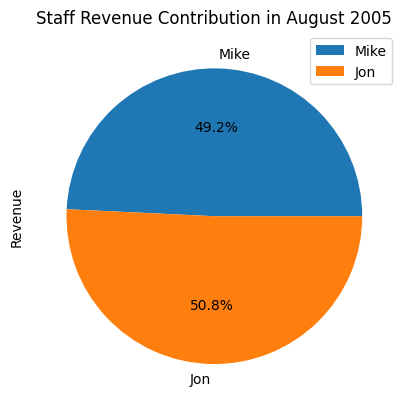

In [5]:
# We have 2 staff members, Mike and Jon. Determine the staff member that contributed the most to our revenue in the month of August in 2005. Visualize their percentage contribution as a pie chart.
# Staff contribution in 2005

query2 = """
SELECT 
    staff.first_name,
    SUM(payment.amount) AS Revenue
FROM payment
JOIN staff ON payment.staff_id = staff.staff_id
WHERE payment.payment_date BETWEEN '2005-08-01' AND '2005-08-31'
GROUP BY staff.staff_id;
"""

df_staff_revenue = pd.read_sql_query(query2, engine)
df_staff_revenue.set_index('first_name').plot(kind='pie', y='Revenue', autopct='%1.1f%%', title='Staff Revenue Contribution in August 2005')


#### Monthly and rental  count of store line graph

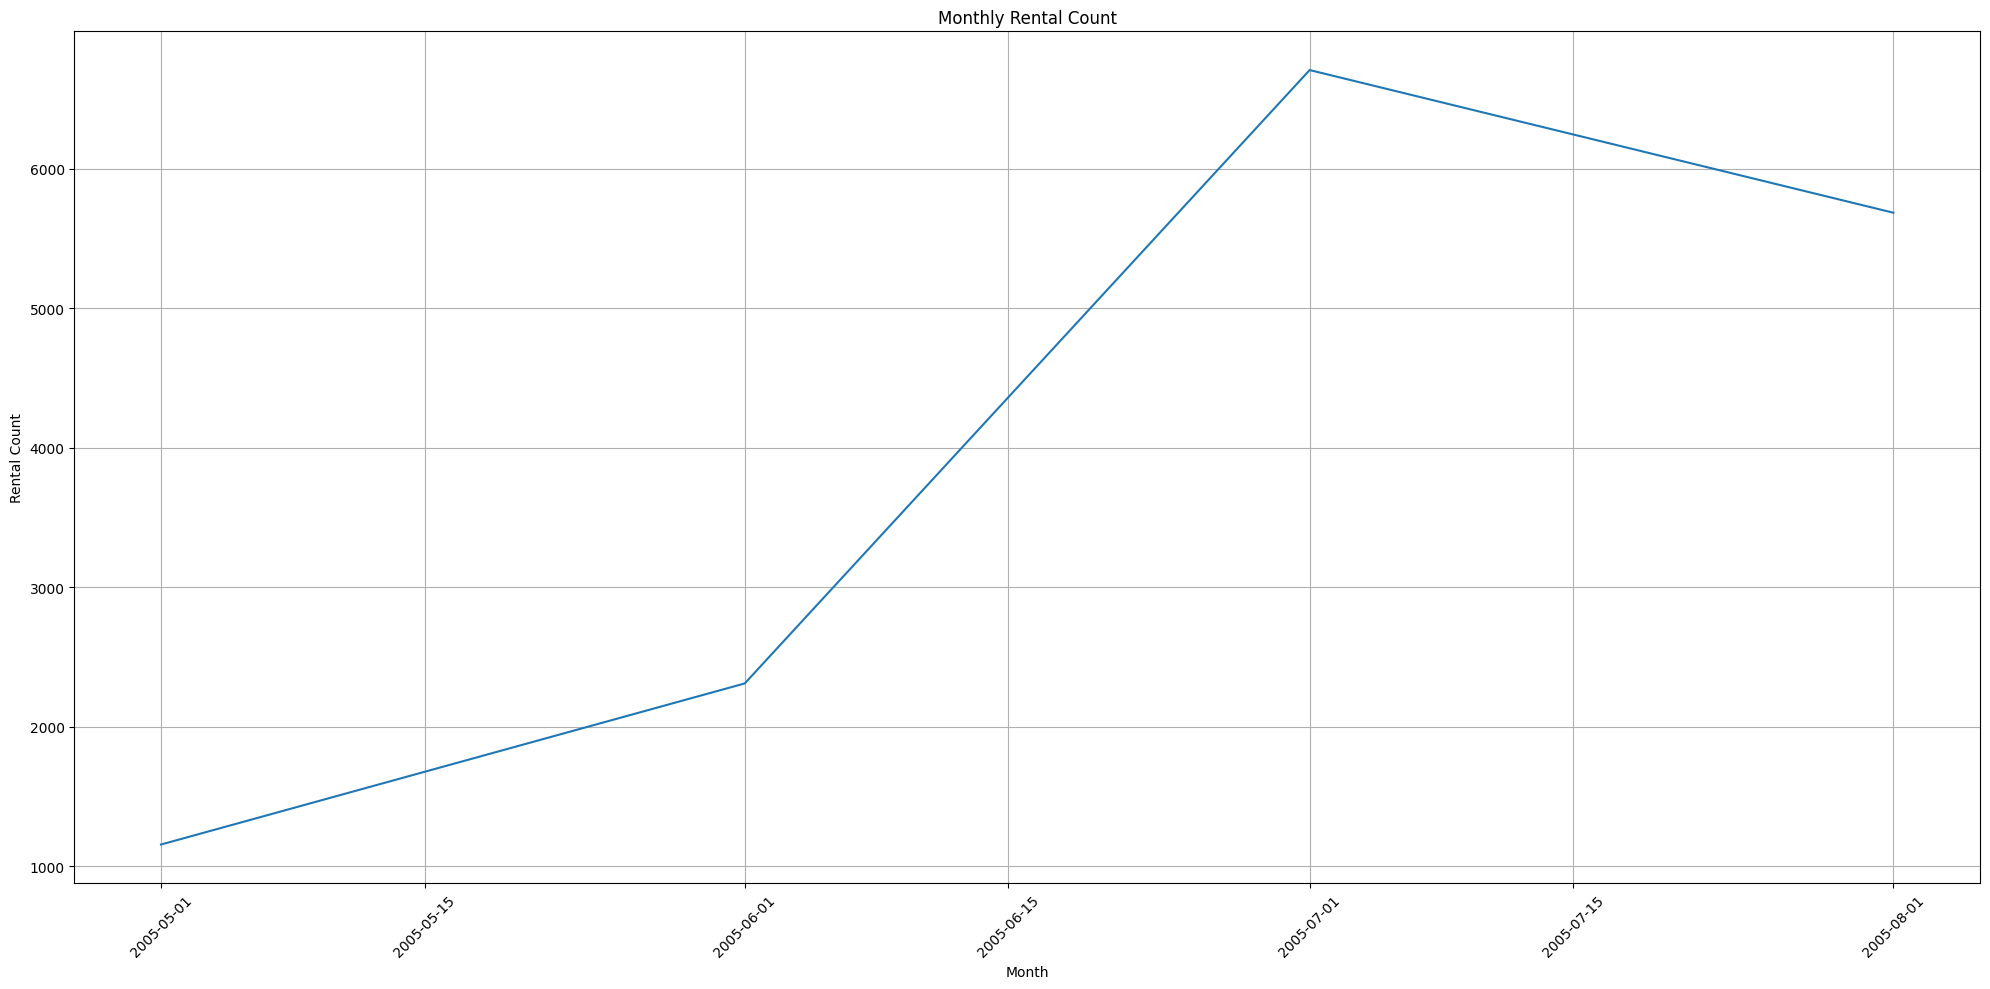

In [6]:
# Create a simple line chart showing the monthly rental count of the store. Do you notice any patterns or trends? 


# Fetching raw rental data
query = """
SELECT 
    rental_date
FROM rental;
"""

df_rental = pd.read_sql_query(query, engine)

# Convert rental_date to datetime
df_rental['rental_date'] = pd.to_datetime(df_rental['rental_date'])

# Extract year and month to a new column
df_rental['RentalMonth'] = df_rental['rental_date'].dt.to_period('M')
# Filter out data for 2006
df_rental = df_rental[df_rental['rental_date'].dt.year != 2006]

# Group by the new column and count the rentals
df_rental_count = df_rental.groupby('RentalMonth').size().reset_index(name='RentalCount')





# Plotting the data
plt.figure(figsize=(20, 10))
plt.plot(df_rental_count['RentalMonth'].dt.to_timestamp(), df_rental_count['RentalCount'])
plt.title('Monthly Rental Count')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Basic bar chart to show the monthly revenue for the rental store.

<Axes: title={'center': 'Monthly Revenue'}, xlabel='RevenueMonth'>

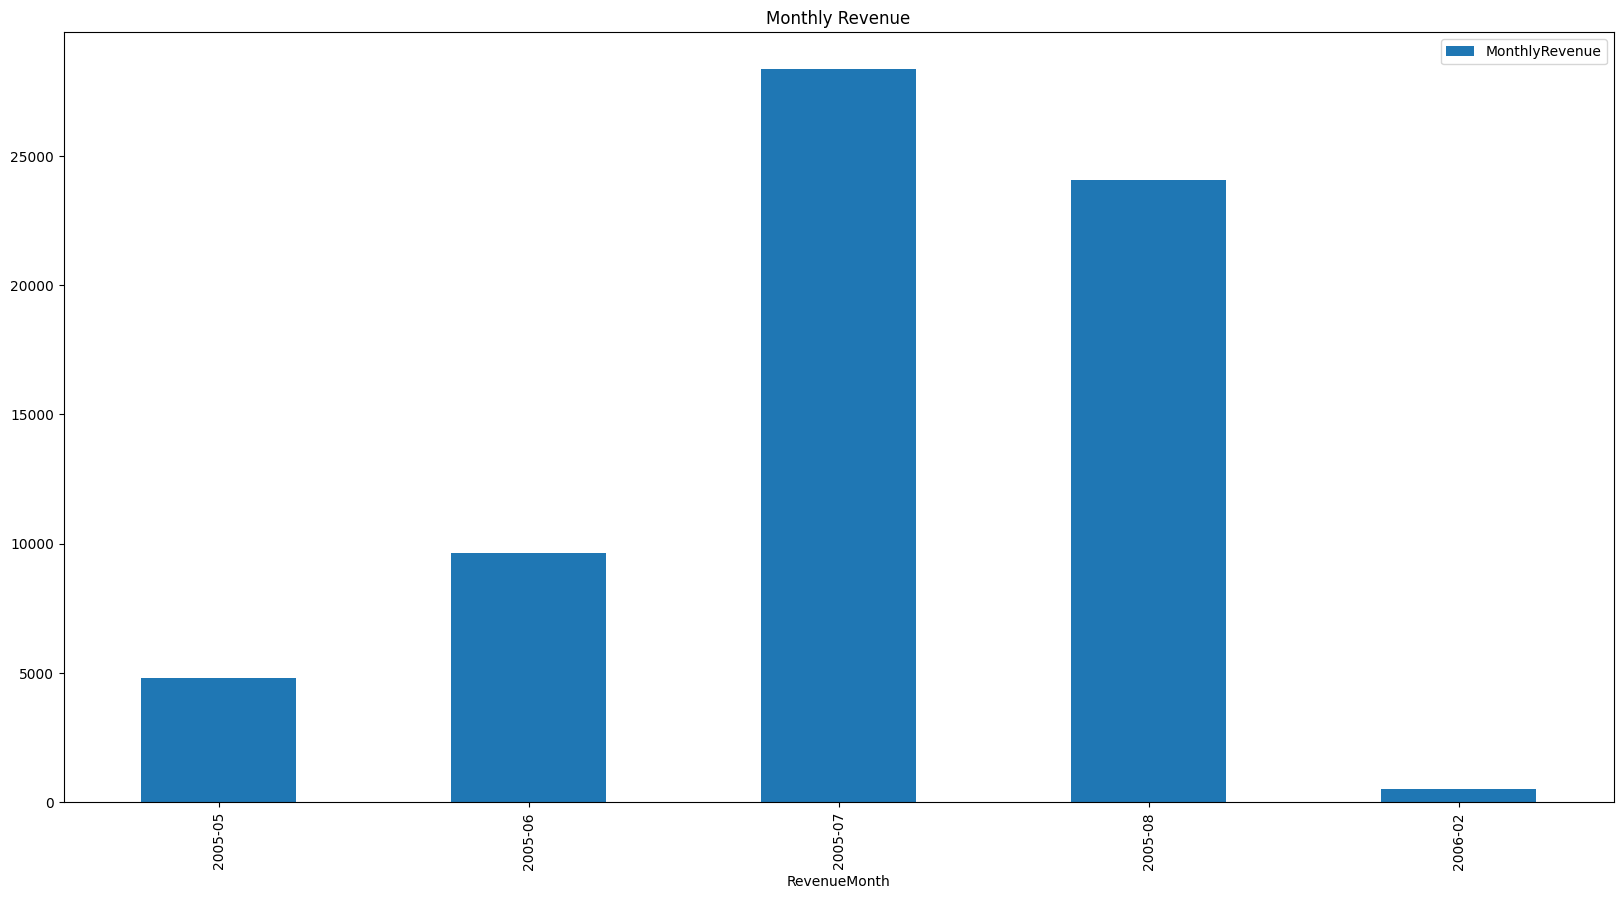

In [12]:
# Monthly rental revenue
# Create a basic bar chart to show the monthly revenue for the rental store.
query4 = """
SELECT 
    DATE_FORMAT(payment_date, '%%Y-%%m') AS RevenueMonth,
    SUM(amount) AS MonthlyRevenue
FROM payment
GROUP BY RevenueMonth;
"""

df_monthly_revenue = pd.read_sql_query(query4, engine)

df_monthly_revenue.plot(kind='bar', x='RevenueMonth', y='MonthlyRevenue', title='Monthly Revenue',figsize=(20, 10))
